<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Using Siphon to get NEXRAD Level 3 data from a TDS</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="https://upload.wikimedia.org/wikipedia/commons/4/4d/Siphoning.JPG" alt="Siphoning" style="height: 300px;"></div>

### Objectives
1. Learn more about Siphon
2. Use the RadarServer class to retrieve radar data from a TDS
3. Plot this data using numpy arrays and matplotlib

In this example, we'll focus on interacting with the Radar Query Service to retrieve radar data.

**But first!**
Bookmark these resources for when you want to use Siphon later!
+ [latest Siphon documentation](http://siphon.readthedocs.org/en/latest/)
+ [Siphon github repo](https://github.com/Unidata/siphon)
+ [TDS documentation](http://www.unidata.ucar.edu/software/thredds/v4.6/tds/TDS.html)


## Querying the server

First, we point at the top level of the Radar Query Service (the "Radar Server") to see what radar collections are available:

In [1]:
from siphon.catalog import TDSCatalog
cat = TDSCatalog('http://thredds.ucar.edu/thredds/radarServer/catalog.xml')
list(cat.catalog_refs)

['NEXRAD Level II Radar for Case Study CCS039',
 'NEXRAD Level II Radar from IDD',
 'NEXRAD Level III Radar for Case Study CCS039',
 'NEXRAD Level III Radar from IDD',
 'TDWR Level III Radar from IDD']

Next we create an instance of the `RadarServer` object to point at one of these collections. This downloads some top level metadata and sets things up so we can easily query the server.

In [2]:
from siphon.radarserver import RadarServer
rs = RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)

We can use rs.variables to see a list of radar products available to view from this access URL.

In [3]:
print(sorted(rs.variables))

['DAA', 'DHR', 'DOD', 'DPA', 'DPR', 'DSD', 'DSP', 'DTA', 'DU3', 'DU6', 'DVL', 'EET', 'HHC', 'N0C', 'N0H', 'N0K', 'N0M', 'N0Q', 'N0R', 'N0S', 'N0U', 'N0V', 'N0X', 'N0Z', 'N1C', 'N1H', 'N1K', 'N1M', 'N1P', 'N1Q', 'N1S', 'N1U', 'N1X', 'N2C', 'N2H', 'N2K', 'N2M', 'N2Q', 'N2S', 'N2U', 'N2X', 'N3C', 'N3H', 'N3K', 'N3M', 'N3Q', 'N3S', 'N3U', 'N3X', 'NAC', 'NAH', 'NAK', 'NAM', 'NAQ', 'NAU', 'NAX', 'NBC', 'NBH', 'NBK', 'NBM', 'NBQ', 'NBU', 'NBX', 'NCR', 'NET', 'NMD', 'NST', 'NTP', 'NVL', 'NVW', 'OHA', 'PTA']


If you're not a NEXRAD radar expert, there is more information available within the metadata downloaded from the server. (**NOTE:** Only the codes above are valid for queries.)

In [4]:
sorted(rs.metadata['variables'])

['DAA/Digital Accumulation Array',
 'DHR/Digital Hybrid Scan Reflectivity',
 'DOD/Digital One-Hour Difference Accumulation',
 'DPA/Digital Precipitation Array',
 'DPR/Digital Instantaneous Precipitation Rate',
 'DSD/Digital Storm Total Difference Accumulation',
 'DSP/Digital Storm Total Precipitation',
 'DTA/Digital Storm Total Accumulation',
 'DU3/Digital 3-hour Accumulation',
 'DU6/Digital 24-hour Accumulation',
 'DVL/Digital Vertically Integrated Liquid',
 'EET/Enchanced Echo Tops',
 'HHC/Hybrid Hydrometeor Classification',
 'N0C/Correlation Coefficient Tilt 1',
 'N0H/Hydrometeor Classification Tilt 1',
 'N0K/Specific Differential Phase Tilt 1',
 'N0M/Melting Layer Tilt 1',
 'N0Q/Base Reflectivity DR Tilt 1',
 'N0R/Base Reflectivity 124nm',
 'N0S/Storm-Rel Mean Vel Tilt 1',
 'N0U/Radial Velocity DV Tilt 1',
 'N0V/Radial Velocity 124nm',
 'N0X/Differential Reflectivity Tilt 1',
 'N0Z/Base Reflecitvity 248nm',
 'N1C/Correlation Coefficient Tilt 3',
 'N1H/Hydrometeor Classification Til

We can also see a list of the stations. Each station has associated location information.

In [5]:
print(sorted(rs.stations))

['ABC', 'ABR', 'ABX', 'ACG', 'AEC', 'AHG', 'AIH', 'AKC', 'AKQ', 'AMA', 'AMX', 'APD', 'APX', 'ARX', 'ATX', 'BBX', 'BGM', 'BHX', 'BIS', 'BLX', 'BMX', 'BOX', 'BRO', 'BUF', 'BYX', 'CAE', 'CBW', 'CBX', 'CCX', 'CLE', 'CLX', 'CRP', 'CXX', 'CYS', 'DAX', 'DDC', 'DFX', 'DGX', 'DIX', 'DLH', 'DMX', 'DOX', 'DTX', 'DVN', 'DYX', 'EAX', 'EMX', 'ENX', 'EOX', 'EPZ', 'ESX', 'EVX', 'EWX', 'EYX', 'FCX', 'FDR', 'FDX', 'FFC', 'FSD', 'FSX', 'FTG', 'FWS', 'GGW', 'GJX', 'GLD', 'GRB', 'GRK', 'GRR', 'GSP', 'GUA', 'GWX', 'GYX', 'HDX', 'HGX', 'HKI', 'HKM', 'HMO', 'HNX', 'HPX', 'HTX', 'HWA', 'ICT', 'ICX', 'ILN', 'ILX', 'IND', 'INX', 'IWA', 'IWX', 'JAX', 'JGX', 'JKL', 'JUA', 'LBB', 'LCH', 'LIX', 'LNX', 'LOT', 'LRX', 'LSX', 'LTX', 'LVX', 'LWX', 'LZK', 'MAF', 'MAX', 'MBX', 'MHX', 'MKX', 'MLB', 'MOB', 'MPX', 'MQT', 'MRX', 'MSX', 'MTX', 'MUX', 'MVX', 'MXX', 'NKX', 'NQA', 'OAX', 'OHX', 'OKX', 'OTX', 'PAH', 'PBZ', 'PDT', 'POE', 'PUX', 'RAX', 'RGX', 'RIW', 'RLX', 'RTX', 'SFX', 'SGF', 'SHV', 'SJT', 'SOX', 'SRX', 'TBW', 'TFX'

In [6]:
rs.stations['TLX']

Station(id='TLX', elevation=370.0, latitude=35.32, longitude=-97.27, name='OKLAHOMA_CITY/Norman')

Next, we'll create a new query object to help request the data. Using the chaining methods, let's ask for reflectivity data at the lowest tilt (NOQ) from radar TLX (Oklahoma City) for the current time. We see that when the query is represented as a string, it shows the encoded URL.

In [7]:
from datetime import datetime
query = rs.query()
query.stations('TLX').time(datetime.utcnow()).variables('N0Q')

var=N0Q&time=2017-04-19T20%3A56%3A49.425145&stn=TLX

The query also supports time range queries, queries for closest to a lon/lat point, or getting all radars within a lon/lat box.

We can use the RadarServer instance to check our query, to make sure we have required parameters and that we have chosen valid station(s) and variable(s).

In [8]:
rs.validate_query(query)

True

Make the request, which returns an instance of TDSCatalog. This handles parsing the catalog

In [9]:
catalog = rs.get_catalog(query)

We can look at the datasets on the catalog to see what data we found by the query. We find one NIDS file in the return

In [10]:
catalog.datasets

OrderedDict([('Level3_TLX_N0Q_20170419_2051.nids',
              <siphon.catalog.Dataset at 0x10fd3d748>)])

### Exercise: Querying the radar server

We'll work through doing some more queries on the radar server. Some useful links:
- RadarQuery [documentation](https://siphon.readthedocs.org/en/latest/api/radarserver.html#siphon.radarserver.RadarQuery)
- Documentation on Python's [datetime.timedelta](https://docs.python.org/3.5/library/datetime.html#timedelta-objects)

See if you can write Python code for the following queries:

Get ZDR (differential reflectivity) for 3 days ago from the radar nearest to Hays, KS (lon -99.324403, lat 38.874929). **No map necessary!**

Get base reflectivity for the last two hours from all of the radars in Wyoming (call it the bounding box with lower left corner 41.008717, -111.056360 and upper right corner 44.981008, -104.042719)

## Pulling out the data

We can pull that dataset out of the dictionary and look at the available access URLs. We see URLs for OPeNDAP, CDMRemote, and HTTPServer (direct download).

In [11]:
ds = list(catalog.datasets.values())[0]
ds.access_urls

{'CdmRemote': 'http://thredds.ucar.edu/thredds/cdmremote/nexrad/level3/IDD/N0Q/TLX/20170419/Level3_TLX_N0Q_20170419_2051.nids',
 'HTTPServer': 'http://thredds.ucar.edu/thredds/fileServer/nexrad/level3/IDD/N0Q/TLX/20170419/Level3_TLX_N0Q_20170419_2051.nids',
 'OPENDAP': 'http://thredds.ucar.edu/thredds/dodsC/nexrad/level3/IDD/N0Q/TLX/20170419/Level3_TLX_N0Q_20170419_2051.nids'}

We'll use the CDMRemote reader in Siphon and pass it the appropriate access URL. (This will all behave identically to using the 'OPENDAP' access, if we replace the `Dataset` from Siphon with that from `netCDF4`).

In [12]:
from siphon.cdmr import Dataset
data = Dataset(ds.access_urls['CdmRemote'])

The CDMRemote reader provides an interface that is almost identical to the usual python NetCDF interface. 

In [13]:
list(data.variables)

['elevation',
 'azimuth',
 'gate',
 'latitude',
 'longitude',
 'altitude',
 'rays_time',
 'BaseReflectivityDR_RAW',
 'BaseReflectivityDR']

We pull out the variables we need for azimuth and range, as well as the data itself.

In [14]:
rng = data.variables['gate'][:]
az = data.variables['azimuth'][:]
ref = data.variables['BaseReflectivityDR'][:]

Then convert the polar coordinates to Cartesian using numpy

In [15]:
import numpy as np
x = rng * np.sin(np.deg2rad(az))[:, None]
y = rng * np.cos(np.deg2rad(az))[:, None]
ref = np.ma.array(ref, mask=np.isnan(ref))

Finally, we plot them up using matplotlib and cartopy.

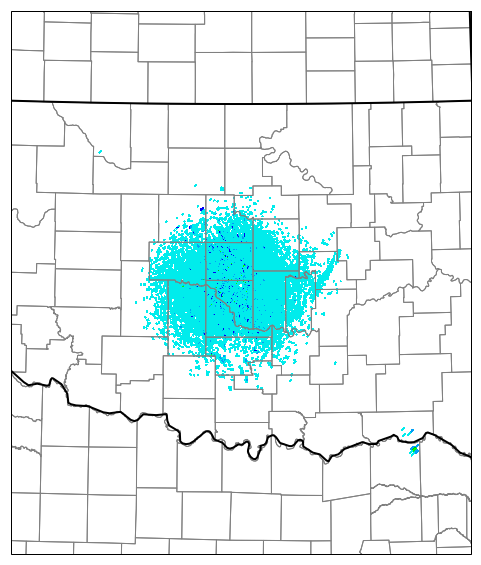

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy
from metpy.plots import ctables  # For NWS colortable

# Create projection centered on the radar. This allows us to use x
# and y relative to the radar.
proj = cartopy.crs.LambertConformal(central_longitude=data.RadarLongitude,
                                    central_latitude=data.RadarLatitude)

# New figure with specified projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Grab state borders
state_borders = cartopy.feature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lakes',
    scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=2, zorder=2)

# Counties
counties = cartopy.io.shapereader.Reader('../../data/counties.shp')
ax.add_geometries(counties.geometries(), cartopy.crs.PlateCarree(),
                  facecolor='None', edgecolor='grey', zorder=1)

# Set limits in lat/lon space
ax.set_extent([data.RadarLongitude - 2.5, data.RadarLongitude + 2.5,
               data.RadarLatitude - 2.5, data.RadarLatitude + 2.5])

# Get the NWS typical reflectivity color table, along with an appropriate norm that
# starts at 5 dBz and has steps in 5 dBz increments
norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 5, 5)
mesh = ax.pcolormesh(x, y, ref, cmap=cmap, norm=norm, zorder=0)

### Exercise: Your turn to plot!

Try making your own plot of radar data. Various options here, but this is pretty open-ended. Some options to inspire you:
- Try working with Level II Data (All variables are three-dimensional and in a single file)
- Try plotting Storm Total Precipitation or Digital Accumulation for an area that recently had a bunch of rain
- Maybe plot Doppler velocity or some dual-pol data (ZDR or correlation coefficient) for recent severe weather. Bonus points for making a multi-panel plot.